# RIGHT THRESHOLD USING ROC CURVE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

In [2]:
X,Y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [6]:
X

array([[-0.62070677,  1.39769519,  0.1034997 , ..., -0.34409714,
         0.62197727, -1.79645246],
       [ 0.90592186,  1.9199751 , -0.7783715 , ..., -1.30560469,
        -1.54476766, -0.24532071],
       [ 0.27902104,  0.85887666,  1.20780417, ...,  2.50374447,
        -0.16497195, -1.95912025],
       ...,
       [ 0.40426899, -0.61988039,  0.87588292, ...,  0.61529851,
         0.97573222,  1.77717222],
       [-0.02512151, -1.05618212, -0.2345739 , ..., -1.6839064 ,
        -0.33327389,  1.13979455],
       [-1.46739126, -0.12314487,  0.66858242, ...,  1.92945851,
        -0.97878106, -2.77522263]])

In [5]:
X.shape

(2000, 20)

In [7]:
Y

array([0, 0, 0, ..., 1, 1, 0])

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [21]:
from sklearn.metrics import roc_curve,roc_auc_score

## RandomForest

from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)
ytrain_pred = model1.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = model1.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9812481248124811


In [22]:
ytest_pred

array([[0.94, 0.06],
       [1.  , 0.  ],
       [0.07, 0.93],
       ...,
       [1.  , 0.  ],
       [0.11, 0.89],
       [0.78, 0.22]])

In [23]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,y_train)
ytrain_pred = model2.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = model2.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc: 0.9876816326530612
RF test roc-auc: 0.9855763354113188


In [24]:
## AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
model3=AdaBoostClassifier()
model3.fit(X_train,y_train)
ytrain_pred = model3.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = model3.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc: 0.9971469387755102
RF test roc-auc: 0.9744530008556412


In [25]:
## KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()
model4.fit(X_train,y_train)
ytrain_pred = model4.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = model4.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc: 0.9800673469387755
RF test roc-auc: 0.9470780411374472


In [26]:
pred = []
for m in [model1,model2,model3,model4]:
    pred.append(pd.Series(m.predict_proba(X_test)[:,1]))

In [27]:
pred

[0      0.06
 1      0.00
 2      0.93
 3      0.01
 4      0.93
        ... 
 595    0.02
 596    0.32
 597    0.00
 598    0.89
 599    0.22
 Length: 600, dtype: float64,
 0      3.648336e-02
 1      2.312949e-02
 2      9.507146e-01
 3      1.964157e-03
 4      9.583813e-01
            ...     
 595    7.765486e-07
 596    2.948489e-01
 597    6.389609e-06
 598    8.878461e-01
 599    1.490575e-03
 Length: 600, dtype: float64,
 0      0.465444
 1      0.460287
 2      0.529213
 3      0.444351
 4      0.527071
          ...   
 595    0.479692
 596    0.505403
 597    0.437920
 598    0.530501
 599    0.478267
 Length: 600, dtype: float64,
 0      0.2
 1      0.4
 2      1.0
 3      0.0
 4      0.6
       ... 
 595    0.0
 596    0.6
 597    0.0
 598    0.4
 599    0.2
 Length: 600, dtype: float64]

In [28]:
final_pred = pd.concat(pred,axis=1).mean(axis = 1)

In [29]:
final_pred

0      0.190482
1      0.220854
2      0.852482
3      0.114079
4      0.753863
         ...   
595    0.124923
596    0.430063
597    0.109482
598    0.677087
599    0.224939
Length: 600, dtype: float64

In [30]:
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,final_pred)))

RF test roc-auc: 0.9820870975986488


In [31]:
fpr,tpr,thresholds = roc_curve(y_test,final_pred)

In [32]:
thresholds

array([1.89041967, 0.89041967, 0.88550467, 0.88543953, 0.85002997,
       0.8455096 , 0.81979086, 0.81943271, 0.79811204, 0.79789423,
       0.78621466, 0.78211698, 0.76315537, 0.7621604 , 0.75386306,
       0.75306488, 0.75209728, 0.75159746, 0.7356223 , 0.73440628,
       0.72738363, 0.72229835, 0.69696242, 0.69664051, 0.65908404,
       0.65356987, 0.58919907, 0.58501651, 0.5767846 , 0.56042405,
       0.55119648, 0.54704108, 0.50869184, 0.49881384, 0.49291005,
       0.45636699, 0.4473743 , 0.27976654, 0.27851177, 0.13905293,
       0.13777874, 0.11809324, 0.11805224, 0.105838  ])

In [35]:
from sklearn.metrics import accuracy_score

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_pred>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))    

In [36]:
accuracy_ls

[0.495,
 0.495,
 0.505,
 0.5066666666666667,
 0.6966666666666667,
 0.6983333333333334,
 0.7766666666666666,
 0.7783333333333333,
 0.84,
 0.8416666666666667,
 0.845,
 0.8466666666666667,
 0.8716666666666667,
 0.8733333333333333,
 0.8833333333333333,
 0.885,
 0.885,
 0.8866666666666667,
 0.9016666666666666,
 0.9033333333333333,
 0.9116666666666666,
 0.9133333333333333,
 0.9266666666666666,
 0.9283333333333333,
 0.95,
 0.9516666666666667,
 0.96,
 0.9616666666666667,
 0.9633333333333334,
 0.9616666666666667,
 0.9616666666666667,
 0.9633333333333334,
 0.9616666666666667,
 0.9616666666666667,
 0.96,
 0.955,
 0.9533333333333334,
 0.89,
 0.8883333333333333,
 0.69,
 0.6883333333333334,
 0.6033333333333334,
 0.6016666666666667,
 0.5066666666666667]

In [37]:
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
31,0.547041,0.963333
28,0.576785,0.963333
30,0.551196,0.961667
33,0.498814,0.961667
32,0.508692,0.961667


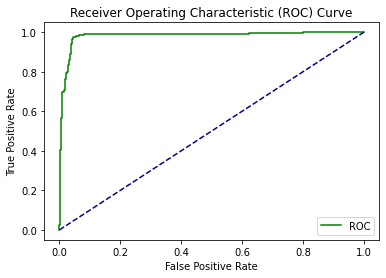

In [39]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)